## Mario Enrique Pisquiy Gómez
### 20200399

## Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

%matplotlib inline

## Cargar Data

In [2]:
df = pd.read_csv('C:/GitHub/pythonPrograms/machineLearningModels2023/datasets/airlines_delay.csv')
df.drop(df.columns[0],axis=1,inplace=True)
df.head(3)

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,1296.0,141.0,DL,ATL,HOU,1,0
1,360.0,146.0,OO,COS,ORD,4,0
2,1170.0,143.0,B6,BOS,CLT,3,0


In [3]:
df.isna().sum()

Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [4]:
df.dtypes

Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object

In [5]:
df['Airline'].unique()

array(['DL', 'OO', 'B6', 'US', 'FL', 'WN', 'CO', 'AA', 'YV', 'EV', 'XE',
       '9E', 'OH', 'UA', 'MQ', 'AS', 'F9', 'HA'], dtype=object)

In [6]:
df['DayOfWeek'].unique()

array([1, 4, 3, 6, 7, 2, 5], dtype=int64)

In [7]:
df['Class'].unique()

array([0, 1], dtype=int64)

## Split

In [8]:
y = df.loc[:,'Class']
df.drop(['Class'],axis=1,inplace=True)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=20)

In [10]:
for i in X_train.columns:
    nas = X_train[i].isna().sum()
    if nas>0:
        print("{0:<20}  {1}".format(i,nas))

## Separar segun numericas o categoricas

In [11]:
X_train.dtypes

Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
dtype: object

In [12]:
X_train.select_dtypes(include='number').columns

Index(['Time', 'Length', 'DayOfWeek'], dtype='object')

In [13]:
X_train.select_dtypes(exclude='number').columns

Index(['Airline', 'AirportFrom', 'AirportTo'], dtype='object')

## Pipeline

## Numerica

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
                            ('imputer', SimpleImputer(strategy="median")),
                            ('std_scaler', StandardScaler()),
                        ])

In [15]:
df_num_tr = num_pipeline.fit_transform(df.select_dtypes(include='number'))
df_num_tr[0,:]

array([ 1.77407013,  0.12547455, -1.53012021])

## Categoricas

In [16]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy="most_frequent")),
                        ('oh_enc', OneHotEncoder()),
                        ])

In [17]:
# test categorical pipeline
# --------------------------
df_cat_tr = cat_pipeline.fit_transform(df.select_dtypes(exclude='number'))

# review output from pipeline
df_cat_tr.toarray()[0,:]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
## Pipeline completo

In [19]:
from sklearn.compose import ColumnTransformer

num_attribs = df.select_dtypes(include='number').columns
cat_attribs = df.select_dtypes(exclude='number').columns

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [20]:
full_pipeline.fit(df)
X_train_processed = full_pipeline.transform(X_train)
#X_train_processed = full_pipeline.fit_transform(X_train)

print(X_train_processed.shape)

X_train_processed[0,:]

(377567, 607)


<1x607 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

## Pipeline con modelo

In [22]:
from sklearn.ensemble import RandomForestClassifier

# create instance
forest_clf = RandomForestClassifier(random_state=42)

forest_clf.fit(X_train_processed[:6000], y_train[:6000])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7664\251122248.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  forest_clf.fit(X_train_processed[:6000], y_train[:6000])


RandomForestClassifier(random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("forest_clf", RandomForestClassifier(n_estimators=2, random_state=42, n_jobs = 6))
    ])

In [22]:
full_pipeline_with_predictor.fit(X_train, y_train)



Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['Time', 'Length', 'DayOfWeek'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oh_enc',
                                                                   OneHotEncoder())]),
                                                  Index(['Airline', 'AirportFrom', 'AirportTo'], dtype='object'))])),
                ('forest_clf',
                 RandomForestClassifier(n_estimators=2, n_jobs=6,
                                        random_state=42))])

In [23]:
full_pipeline_with_predictor.predict(X_test)

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [25]:
# Test model and pipeline
# -----------------------
from sklearn.metrics import mean_squared_error

# NO ES fit_transform() 
X_test_processed = full_pipeline.transform(X_test)
final_predictions = full_pipeline_with_predictor.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.6262891102554564

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, final_predictions)
cm

array([[65051, 24901],
       [38569, 33294]], dtype=int64)

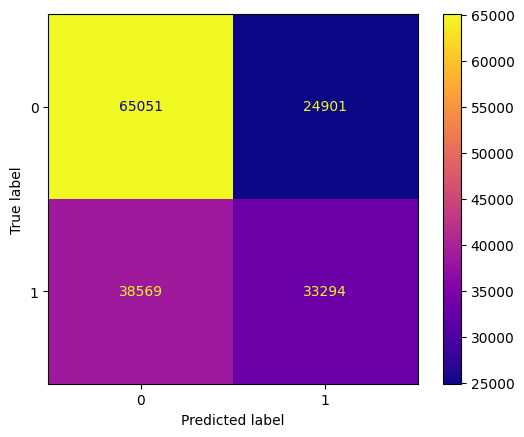

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(full_pipeline_with_predictor, X_test, y_test, cmap='plasma')
plt.show()

In [28]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, final_predictions)

0.5721110061001804

In [29]:
recall_score(y_test, final_predictions)

0.463298220224594

In [30]:
from sklearn.metrics import f1_score

f1_score(y_test, final_predictions)

0.5119869596641498